<a href="https://colab.research.google.com/github/Aparna0112/Aparna0112/blob/main/apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT: APPLE QUALITY ANALYSIS**

"*Apple Quality" dataset – a comprehensive compilation providing insights into the characteristics of various apple varieties. This dataset encompasses a range of attributes, including fruit size, weight, sweetness, crunchiness, juiciness, ripeness, acidity, and an overall quality rating. Sourced from an esteemed American agriculture company*.

**Import all required libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_curve,auc,ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier





**Load dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/apple_quality.csv')
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


**Drop column**

In [ ]:
df.drop([4000],inplace=True)
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


**To check imbalaced data**

In [ ]:
df['Quality'].value_counts()

good    2004
bad     1996
Name: Quality, dtype: int64

**Exploratory Data Analysis**

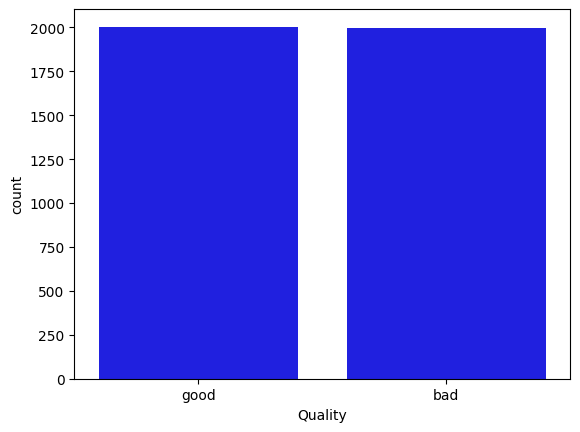

In [ ]:
#Distribution of target variable

sns.countplot(x=df.Quality,data=df,color='blue')
plt.show()


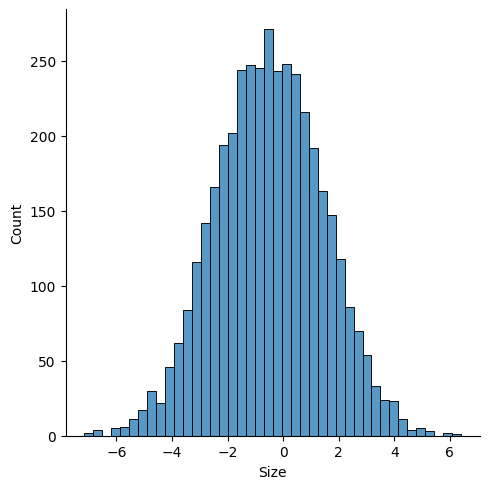

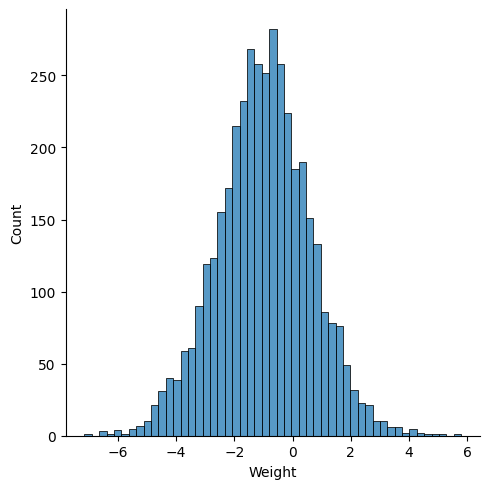

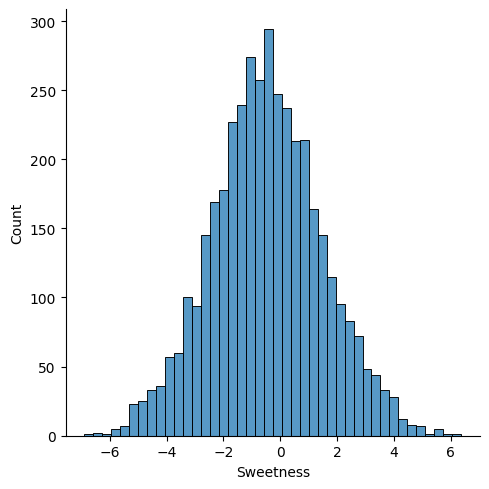

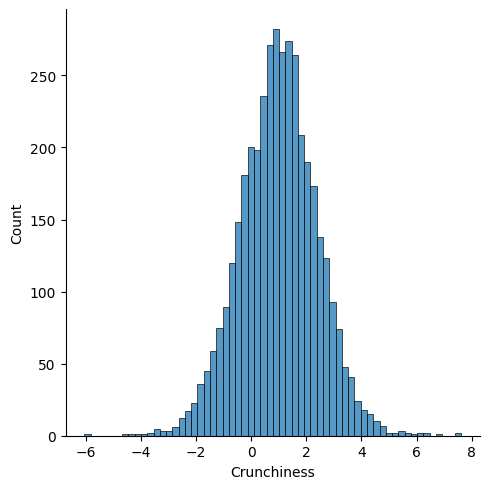

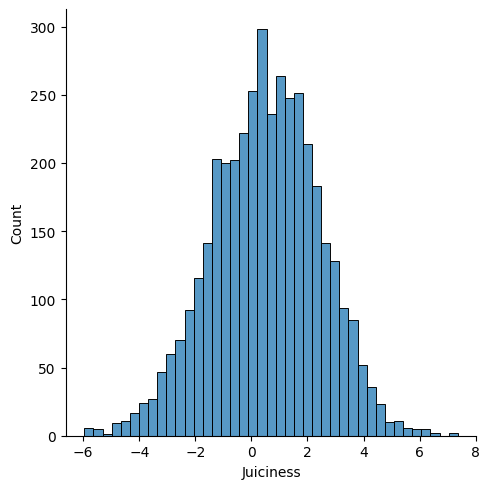

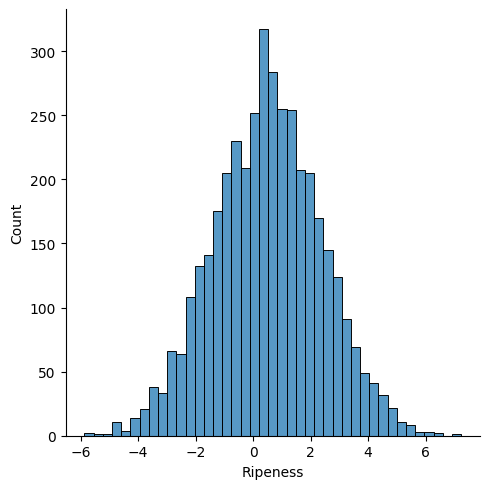

In [ ]:
#Distribution of features

features=['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness']
for column in features:
  sns.displot(x=column,data=df)
  plt.show()

<ipython-input-40-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

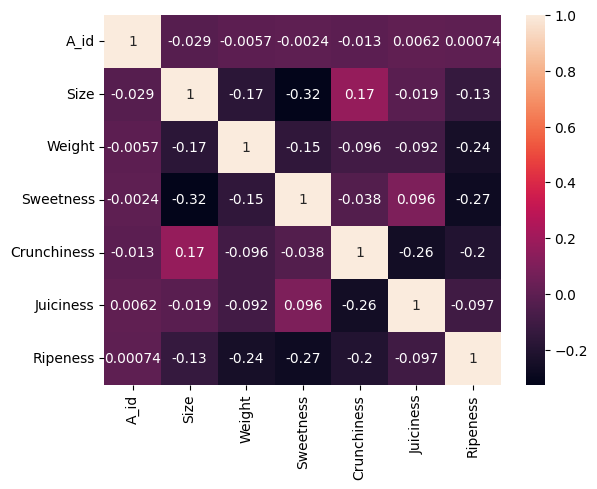

In [ ]:
sns.heatmap(df.corr(),annot=True)

**Change to numeric values using map()**

In [ ]:
df['Quality']=df['Quality'].map({'good':1,'bad':0})

**Check missing value**

In [ ]:
df.isna().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [ ]:
df.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality          int64
dtype: object

In [ ]:
df['Acidity']=df['Acidity'].astype(float)

In [ ]:
df.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality          int64
dtype: object

**Separate input and output variables**

In [ ]:
X=df.iloc[:,:-1]
X

,Model
0,KNeighbors
1,SVC
2,GaussianNB
3,RandomForest
4,AdaBoost
5,DecisionTree


In [ ]:
y=df.iloc[:,-1]
y

0       1
1       1
2       0
3       1
4       1
       ..
3995    0
3996    1
3997    0
3998    1
3999    1
Name: Quality, Length: 4000, dtype: int64

**Scaling**

In [ ]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

ValueError: could not convert string to float: 'KNeighbors'

**Splitting the dataset into training and testing data**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=1,test_size=0.3)

In [ ]:
X_train.shape,y_train.shape

In [ ]:
X_test.shape,y_test.shape

**Model creation**

In [ ]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
y_pred_knn

In [ ]:
print(classification_report(y_test,y_pred_knn))

In [ ]:
sv=SVC()
sv.fit(X_train,y_train)
y_pred_sv=sv.predict(X_test)
print(classification_report(y_test,y_pred_sv))

In [ ]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb=nb.predict(X_test)
print(classification_report(y_test,y_pred_nb))

In [ ]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred_clf=clf.predict(X_test)
print(classification_report(y_test,y_pred_clf))

In [ ]:
rf=RandomForestClassifier(random_state=5)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))

In [ ]:
ad=AdaBoostClassifier(random_state=1)
ad.fit(X_train,y_train)
y_pred_ad=ad.predict(X_test)
print(classification_report(y_test,y_pred_ad))

In [ ]:
from xgboost import XGBClassifier
ad=AdaBoostClassifier(random_state=1)
ad.fit(X_train,y_train)
y_pred_ad=ad.predict(X_test)
print(classification_report(y_test,y_pred_ad))

**Hyper parameter tuning**

In [ ]:
# RandomForestClassifier
param_grid={
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(RandomForestClassifier(),param_grid=param_grid)
grid_search.fit(X_train,y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=9,
                       n_estimators=150)


RandomForestClassifier(random_state=5)
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       587
           1       0.92      0.87      0.90       613

    accuracy                           0.90      1200
   macro avg       0.90      0.90      0.90      1200
weighted avg       0.90      0.90      0.90      1200



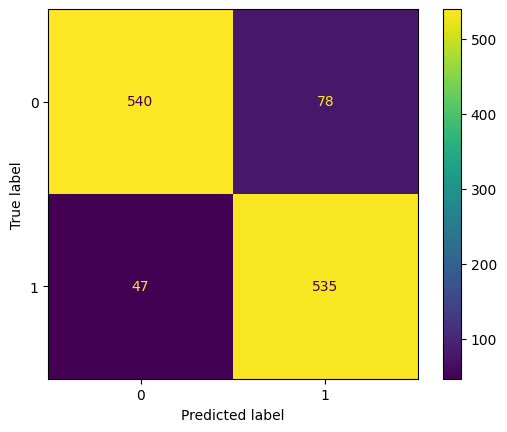

In [ ]:
model_grid=RandomForestClassifier(max_depth=6,
                                    max_features="log2",
                                    max_leaf_nodes=9,
                                    n_estimators=50)
model_grid.fit(X_train, y_train)
y_pred_grid=rf.predict(X_test)
print(rf)
print(classification_report(y_pred_grid,y_test))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_grid))

**Receiver Operating Charateristice (ROC) Curve**

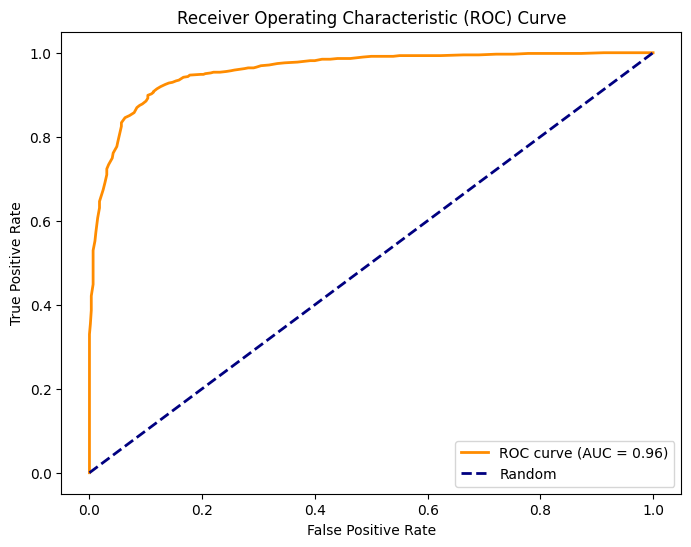

In [ ]:

y_prob=rf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc=auc(fpr,tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr,tpr,color='darkorange',lw=2,label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1],color='navy',lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Accuracy**

In [ ]:
dic={'Model':['KNeighbors','SVC','GaussianNB','RandomForest','AdaBoost','DecisionTree'],
     'Accuracy':[89,88,76,90,77,82]}
df=pd.DataFrame(dic)
df

,Model,Accuracy
0,KNeighbors,89
1,SVC,88
2,GaussianNB,76
3,RandomForest,90
4,AdaBoost,77
5,DecisionTree,82


In [ ]:
pickle.dump(rf,open('ran_model.sav','wb'))
pickle.dump(scaler,open('ran_scaler.sav','wb'))